## Roulette

- European Roulette: Single zero, $\frac{1}{37}$
- American Roulette: Double zero, $\frac{1}{38}$
- Sands? Roulette:  Triple zero,  $\frac{1}{39}$


<img src="https://technofaq.org/wp-content/uploads/2018/02/American-Roulette.png.webp"> </img>

In [4]:
import random
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

## Using the random library

In [7]:
random.randint(1, 38)  # single number odds

13

In [13]:
random.choice(18*["Red"]+ 18*["Black"] + 2*["Green"])

'Black'

## Defining a basic game

In [122]:
POCKETS_AMERICAN = 18*["Red"]+ 18*["Black"] + 2*["Green"]

INITIAL_BANKROLL = 1000
MIN_BET = 5
MAX_SPINS_PER_SESH = 50
NUM_OF_TRIALS = 50  # How many sessions we want to simulate

In [123]:
def bet_red(game_type=POCKETS_AMERICAN, bankroll=INITIAL_BANKROLL) -> list:  
    """Bet the same amount, only red."""
    bankroll_history = [bankroll]
    spin_counter = 0
    
    while spin_counter < MAX_SPINS_PER_SESH:
        spin_result = random.choice(game_type)
        bankroll = bankroll+MIN_BET if spin_result == "Red" else bankroll-MIN_BET
        bankroll_history.append(bankroll)
        spin_counter += 1
    return bankroll_history

<IPython.core.display.Javascript object>


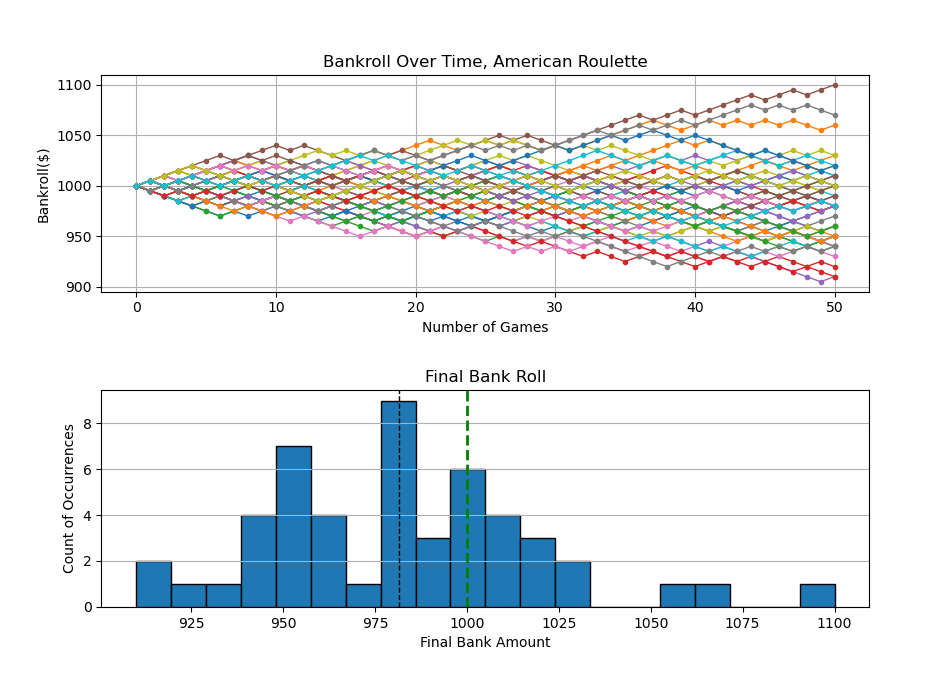

In [124]:
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, figsize=(9.5, 7))
fig.tight_layout(pad=5.0)

TRIAL_HISTORY_AMER = []  # each item in list will contain history(list) for one 'session'

for i in range(NUM_OF_TRIALS):
    session = bet_red(POCKETS_AMERICAN, INITIAL_BANKROLL)
    TRIAL_HISTORY_AMER.append(session)
    ax1.plot(session, linewidth=1, marker='o', markersize=3)

ax1.grid(True)
ax1.set_title("Bankroll Over Time, American Roulette")
ax1.set(xlabel='Number of Games', ylabel='Bankroll($)')

final_bank_rolls = np.array([bank_roll[-1] for bank_roll in TRIAL_HISTORY_AMER])
counts, bins = np.histogram(final_bank_rolls, bins=20)
ax2.hist(bins[:-1], bins, weights=counts, edgecolor='k')

ax2.grid(True, axis='y')
ax2.set_title("Final Bank Roll")
ax2.set(xlabel='Final Bank Amount', ylabel='Count of Occurrences')
ax2.axvline(final_bank_rolls.mean(), color='k', linestyle='dashed', linewidth=1);
ax2.axvline(INITIAL_BANKROLL, color='g', linestyle='dashed', linewidth=2);

### Let's calculate the expected return derived by simulation (American roulette)...
Better known in math as Expected Value (EV), i.e. 

$$
EV = \mu = \Sigma P(X_{i}) \cdot X_{i} = 
$$

In theory, the EV for betting `MIN_BET` on red is:
$$
= (18/38)(5) + (20/38)(-5) = -0.2631
$$
<br>
Let's see how close our simulation gets. Start with a single 'session':


In [127]:
final_bankroll = TRIAL_HISTORY_AMER[3][-1]
number_of_plays = len(TRIAL_HISTORY_AMER[3])

(final_bankroll-INITIAL_BANKROLL)/number_of_plays

-0.39215686274509803

Calculate over all the sessions in record- should be a bit closer to the real answer:

In [128]:
expected_val_history = []
for trial in TRIAL_HISTORY_AMER:
    final_bankroll = trial[-1]
    number_of_plays = len(trial)
    trial_exp_val = (final_bankroll-INITIAL_BANKROLL)/number_of_plays
    expected_val_history.append(trial_exp_val)

ev= sum(expected_val_history)/len(expected_val_history)
print(f"Expected Value is: ${round(ev,3)} per bet")

Expected Value is: $-0.365 per bet


## Eat, Sleep, Simulate, Repeat

----

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

### But some of us need help sleeping. 
<br>
What about different betting strategies? Real rules:

- If we win, make the bet `MIN_BET`, if we lose double down (`2*MIN_BET`)
- Max bet of $1,000. We can only double down so many times!

In [40]:
def bet_red_double_down(game_type=POCKETS_AMERICAN, bankroll=INITIAL_BANKROLL) -> list:  
    """Bet the same amount, only red."""
    bankroll_history = [bankroll]
    spin_counter = 0
    current_bet = MIN_BET
    
    while spin_counter < MAX_SPINS_PER_SESH and (bankroll- current_bet) >= 0:
        spin_result = random.choice(game_type)
        if spin_result == "Red":                   # we won!
            bankroll = bankroll + current_bet
            current_bet = MIN_BET                  # restart bet to minimum
        else:                                      # we lost :-(
            bankroll = bankroll - current_bet
            current_bet = current_bet*2            # double down!
            current_bet = min(1000, current_bet)   # with rules
        bankroll_history.append(bankroll)
        spin_counter += 1
    return bankroll_history

<IPython.core.display.Javascript object>


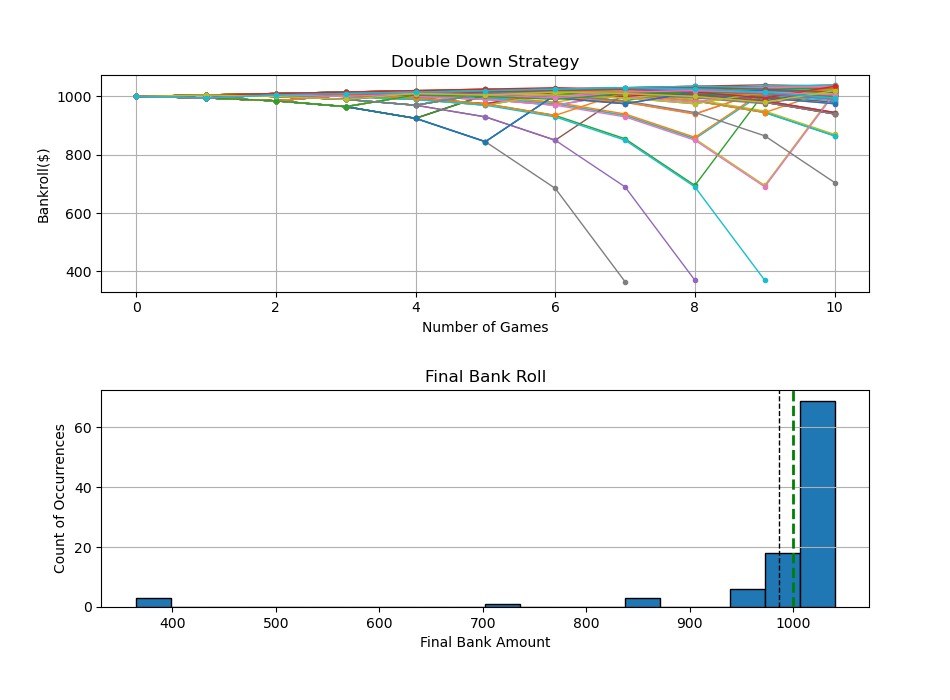

In [137]:
fig, (ax3, ax4) = plt.subplots(ncols=1, nrows=2, figsize=(9.5, 7))
fig.tight_layout(pad=5.0)

INITIAL_BANKROLL = 1000
MIN_BET = 5
MAX_SPINS_PER_SESH = 10
NUM_OF_TRIALS = 100  # How many sessions we want to simulate

DOUBLE_DOWN_HISTORY = []
for i in range(NUM_OF_TRIALS):
    session = bet_red_double_down(POCKETS_AMERICAN, INITIAL_BANKROLL)
    DOUBLE_DOWN_HISTORY.append(session)
    ax3.plot(session, linewidth=1, marker='o', markersize=3)

ax3.grid(True)
ax3.set_title("Double Down Strategy")
ax3.set(xlabel='Number of Games', ylabel='Bankroll($)')


final_bank_rolls = np.array([bank_roll[-1] for bank_roll in DOUBLE_DOWN_HISTORY])
counts, bins = np.histogram(final_bank_rolls, bins=20)
ax4.hist(bins[:-1], bins, weights=counts, edgecolor='k')

ax4.grid(True, axis='y')
ax4.set_title("Final Bank Roll")
ax4.set(xlabel='Final Bank Amount', ylabel='Count of Occurrences')
ax4.axvline(final_bank_rolls.mean(), color='k', linestyle='dashed', linewidth=1);
ax4.axvline(INITIAL_BANKROLL, color='g', linestyle='dashed', linewidth=2);

Let's see the stats

In [138]:
expected_val_history = []
for trial in DOUBLE_DOWN_HISTORY:
    final_bankroll = trial[-1]
    number_of_plays = len(trial)
    trial_exp_val = (final_bankroll-INITIAL_BANKROLL)/number_of_plays
    expected_val_history.append(trial_exp_val)

ev = sum(expected_val_history)/len(expected_val_history)
print(f"Expected Value is: {round(ev,3)} per bet")

Expected Value is: -1.683 per bet
